In [ ]:
from pushforward_operators import FastNonLinearVectorQuantileRegression
from datasets.synthetic.fnlvqr import FNLVQR_Banana
import torch

dataset = FNLVQR_Banana({})
X, Y = FNLVQR_Banana.sample_joint(1000)

plt.scatter()

/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/fast_non_linear_vector_quantile_regression/vqr/__init__.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/fast_non_linear_vector_quantile_regression/vqr/solvers/regularized_lse.py:192: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_th = tensor(Y, **dtd)


In [6]:
import numpy as np

X_test = np.arange(0.5, 2.5, 0.1).reshape(-1, 1)
vqfs = model.vector_quantile_regression.vector_quantiles(X_test, refine=True)
# U = torch.rand(100, 2)

# pushforwards = torch.cat([vqf.evaluate(u=U.detach().numpy(force=True)) for vqf in vqfs])

In [ ]:
U = torch.rand(100, 2)
vqfs[0].evaluate(u=U.detach().numpy(force=True))

ValueError: u must be of shape (d,), got shape (100, 2)

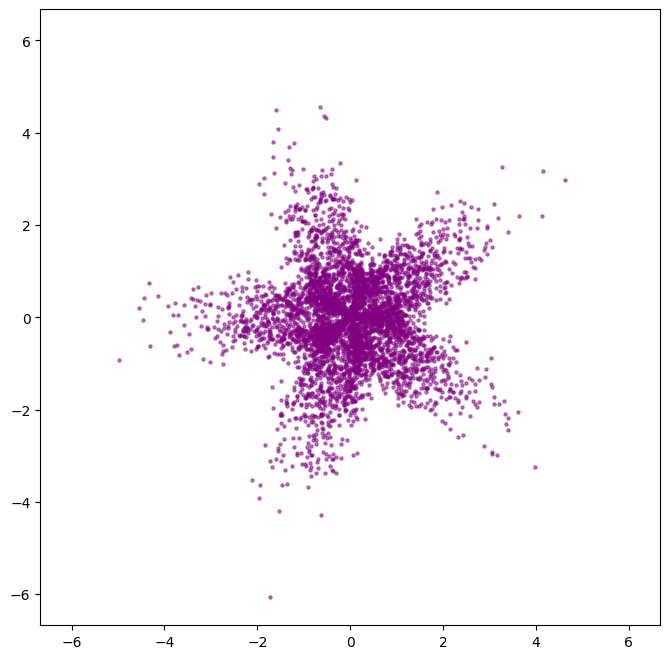

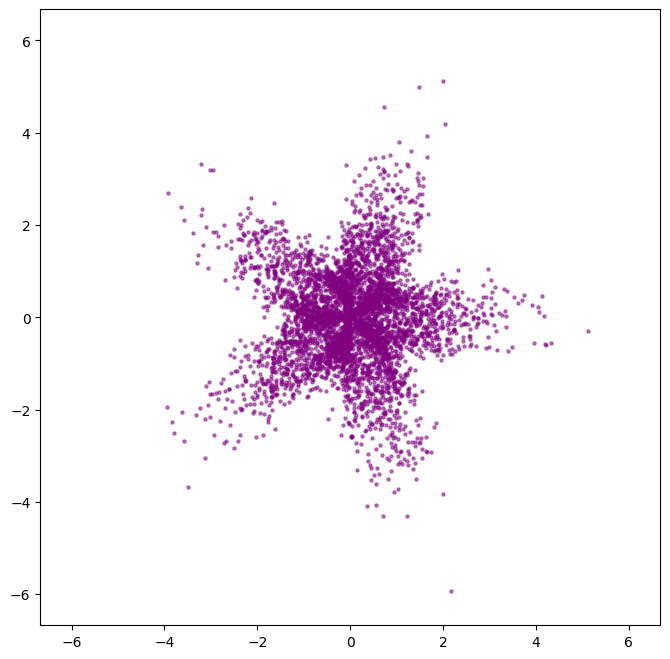

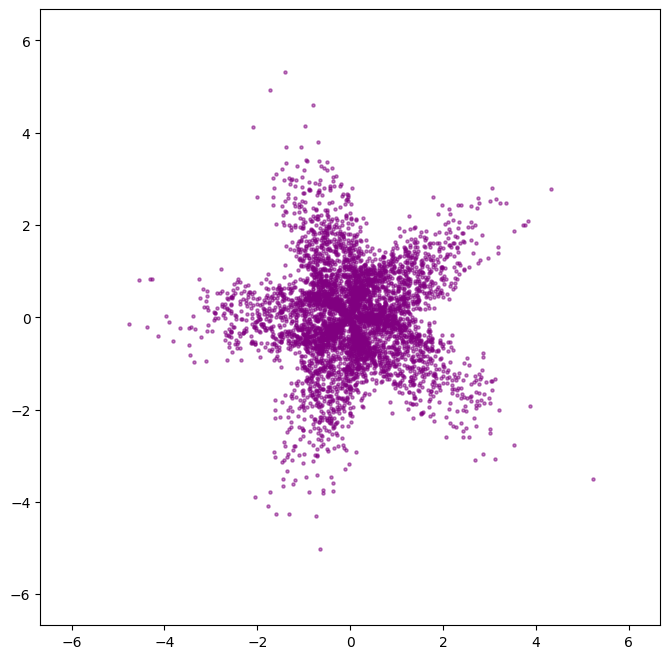

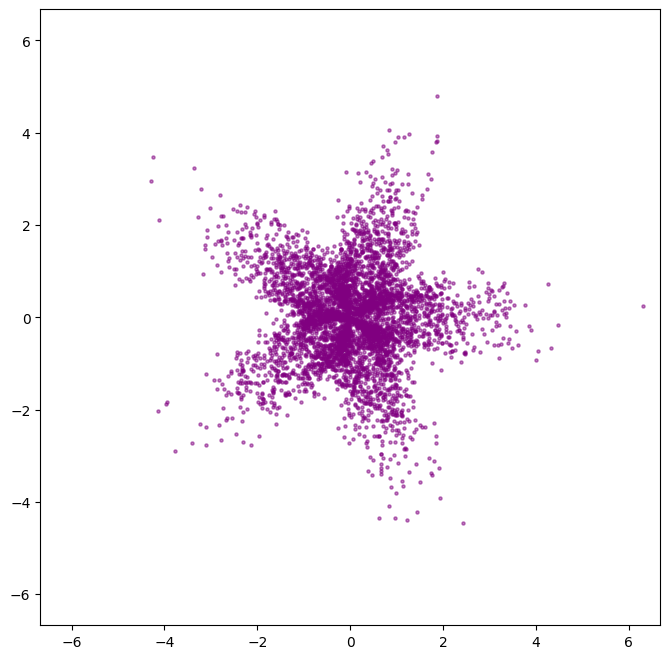

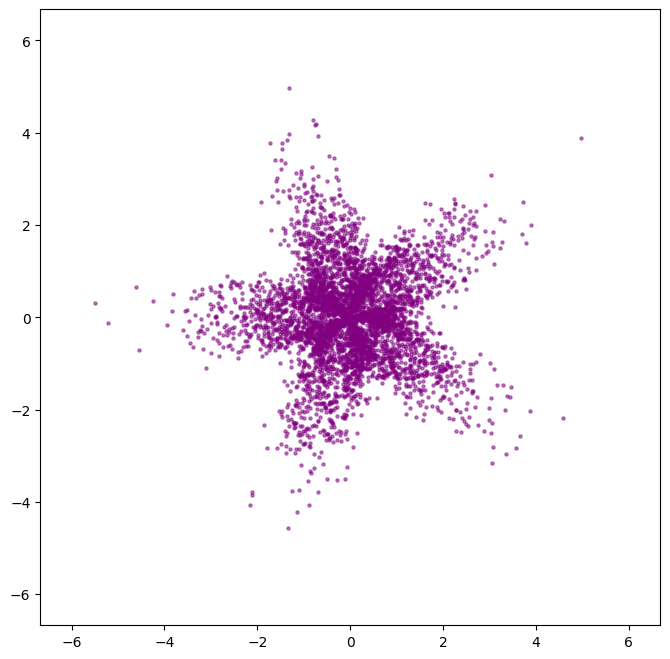

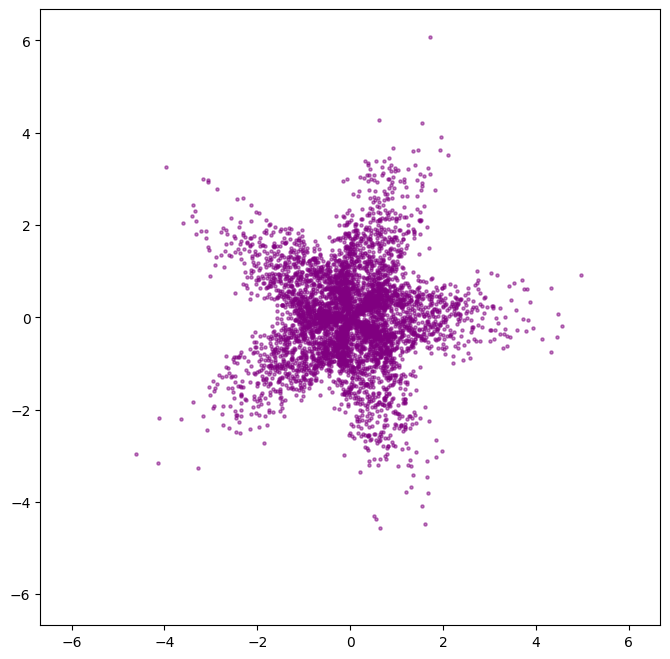

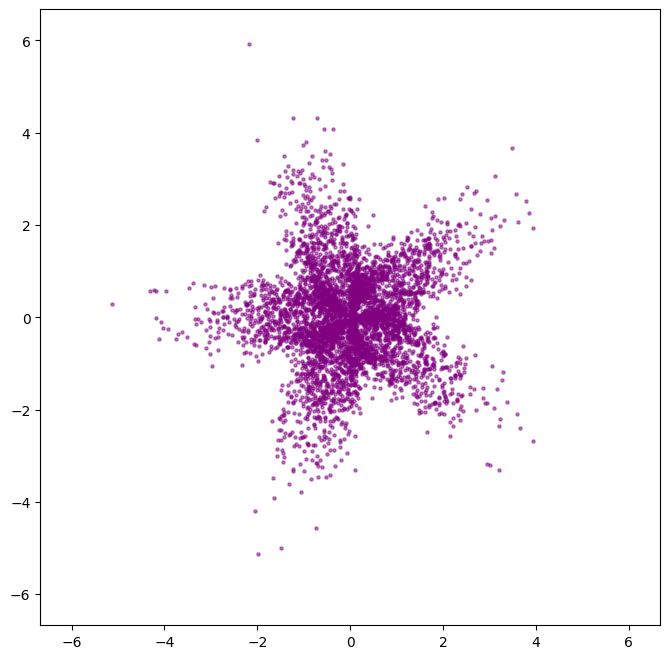

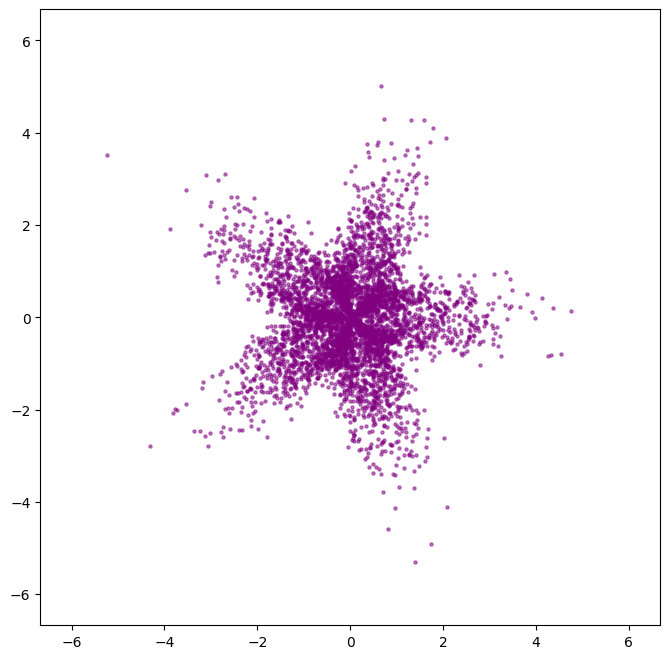

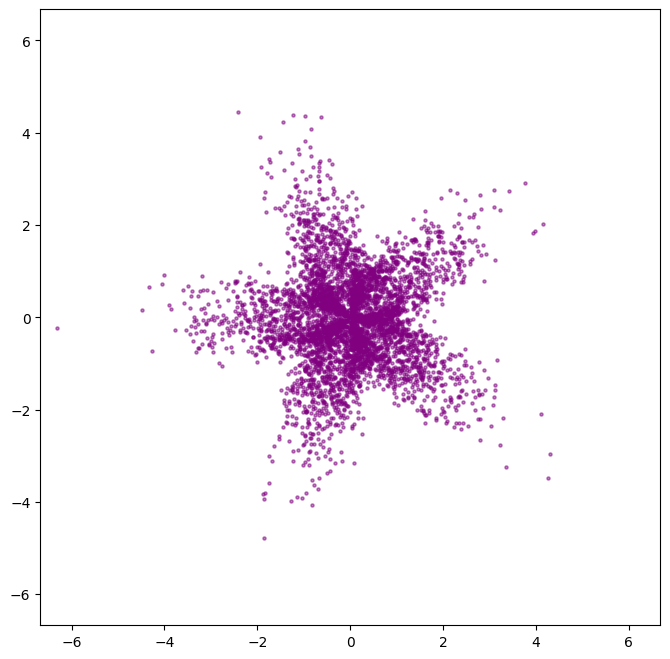

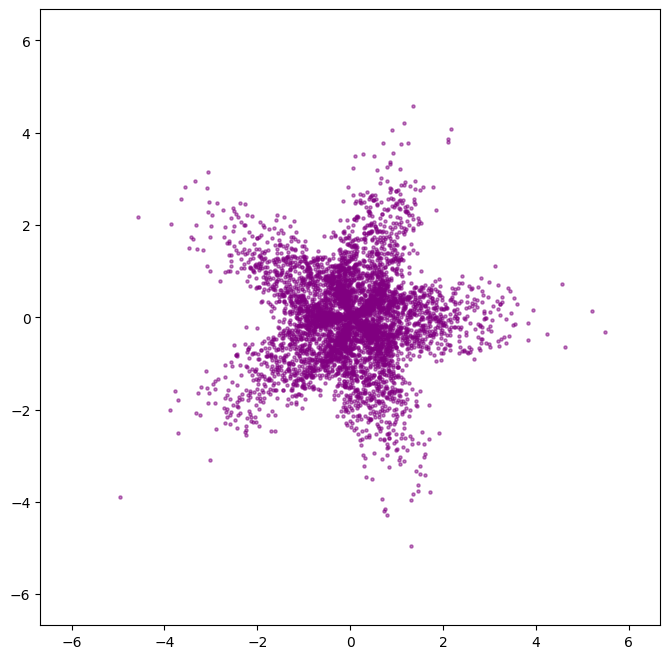

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def transform_to_star(points, k=5, amplitude=0.5):
    """
    Transforms a 2D point cloud into a star shape.

    Args:
        points (np.ndarray): A NumPy array of shape (n, 2) representing the (x, y) coordinates.
        k (int): The number of points for the star. Defaults to 5.
        amplitude (float): Controls the "pointiness" of the star. Must be between 0 and 1.
                           Defaults to 0.5.

    Returns:
        np.ndarray: A new NumPy array with the transformed points.
    """
    if not 0 <= amplitude < 1:
        raise ValueError("Amplitude must be in the range [0, 1).")

    x, y = points[:, 0], points[:, 1]
    theta = np.arctan2(y, x)
    scaling_factor = 1 + amplitude * np.cos(k * theta)
    x_transformed = x * scaling_factor
    y_transformed = y * scaling_factor
    transformed_points = np.stack((x_transformed, y_transformed), axis=1)
    return transformed_points

def rotate_points(points, angle):
    """
    Rotates 2D points around the origin.

    Args:
        points (np.ndarray): The (n, 2) array of points to rotate.
        angle (float): The rotation angle in radians.

    Returns:
        np.ndarray: The rotated points.
    """
    x, y = points[:, 0], points[:, 1]
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    x_rotated = x * cos_angle - y * sin_angle
    y_rotated = x * sin_angle + y * cos_angle
    return np.stack((x_rotated, y_rotated), axis=1)

# --- Main script execution ---
if __name__ == "__main__":
    num_points = 5000
    gaussian_points = np.random.randn(num_points, 2)

    star_points = transform_to_star(gaussian_points, k=5, amplitude=0.5)
    for i in range(10):
        rotated_star_points = rotate_points(star_points, -np.pi + 2 * i * np.pi / 10)
        fig, ax = plt.subplots(figsize=(8, 8))
    
        max_val = np.max(np.abs(star_points)) * 1.1
        ax.set_xlim(-max_val, max_val)
        ax.set_ylim(-max_val, max_val)
        
        scatter = ax.scatter(rotated_star_points[:, 0], rotated_star_points[:, 1], alpha=0.5, s=5, color='purple')
        plt.show()
